# Notebook 4.1 - Monte Carlo Simulation Practice

Management Science - Building Your Crystal Ball

# Introduction

Welcome back to Bean Counter, CEO! In the lecture, we saw how Monte
Carlo simulation helps us make decisions when the future is uncertain.
Now it’s time to apply these techniques to expand your coffee empire and
prepare for the TechVenture competition.

**Your CEO Challenge:** Bean Counter Expansion - analyzing single
locations and portfolios for strategic growth

**Key Skills for Competition:**

-   Simulating uncertain returns
-   Analyzing risk metrics
-   Comparing portfolio combinations
-   Making data-driven recommendations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations # Allows us to generate all portfolio combinations

# Set seed for reproducibility
np.random.seed(42)
print("Libraries loaded! Let's analyze Bean Counter expansion opportunities ☕")

Libraries loaded! Let's analyze Bean Counter expansion opportunities ☕

# Section 1 - Modeling Uncertainty with Distributions

Let’s start by modeling uncertain business variables using probability
distributions.

## Understanding np.random

In [2]:
# Example: Daily customer traffic follows a normal distribution
# Historical data shows: mean = 100, std = 20

# Simulate one day
one_day_customers = np.random.normal(100, 20)
print(f"One random day: {one_day_customers:.0f} customers")

# Simulate many days to see the pattern
many_days = np.random.normal(100, 20, size=1000)
print(f"\n1000 days simulation:")
print(f"  Mean: {many_days.mean():.1f} (expected: 100)")
print(f"  Std Dev: {many_days.std():.1f} (expected: 20)")
print(f"  Min: {many_days.min():.0f}, Max: {many_days.max():.0f}")

One random day: 110 customers

1000 days simulation:
  Mean: 100.4 (expected: 100)
  Std Dev: 19.6 (expected: 20)
  Min: 35, Max: 177

## Exercise 1.1 - Simulate Purchase Amounts

Average purchase per customer varies uniformly between €8 and €12.
Simulate 10,000 purchase amounts.

In [3]:
# YOUR CODE BELOW
# Simulate 10,000 purchase amounts uniformly distributed between 8 and 12
purchase_amounts =

# Calculate statistics
mean_purchase =
min_purchase =
max_purchase =

In [5]:
# Don't modify below - these test your solution
assert len(purchase_amounts) == 10_000, "Should have 10,000 simulations"
assert 9.9 < mean_purchase < 10.1, f"Mean should be ~10, got {mean_purchase:.2f}"
assert 8 <= min_purchase < 9, f"Min should be ~8, got {min_purchase:.2f}"
assert 11 < max_purchase <= 12, f"Max should be ~12, got {max_purchase:.2f}"
print("Great, the purchase simulation is correct!")

## Exercise 1.2 - Calculate Probabilities

Using your simulated data from the previous task, calculate key
probabilities.

In [6]:
# YOUR CODE BELOW
# Using the many_days array from above (1000 days of customer data)
# Calculate the probability of different scenarios

# Probability of getting more than 120 customers
prob_high =

# Probability of getting fewer than 80 customers
prob_low =

# Probability of being within one std dev of mean (80-120)
prob_normal =

In [8]:
# Don't modify below
assert 0.10 < prob_high < 0.20, f"High probability should be ~0.16, got {prob_high:.3f}"
assert 0.10 < prob_low < 0.20, f"Low probability should be ~0.16, got {prob_low:.3f}"
assert 0.65 < prob_normal < 0.72, f"Normal range probability should be ~0.68, got {prob_normal:.3f}"
print(f"  P(>120): {prob_high:.1%}")
print(f"  P(<80): {prob_low:.1%}")
print(f"  P(80-120): {prob_normal:.1%}")
print("Wonderful, probability calculations correct!")

# Section 2 - Building a Complete Business Simulation

Now let’s combine multiple uncertain variables to simulate an entire
business.

## The Bean Counter Store Model

In [9]:
def simulate_bean_counter_day(mean_customers=100, std_customers=20,
                            min_purchase=8, max_purchase=12,
                            fixed_costs=500, variable_cost_rate=0.35):
    """Simulate one day of Bean Counter store operations"""
    # Uncertain variables
    customers = np.random.normal(mean_customers, std_customers)
    avg_purchase = np.random.uniform(min_purchase, max_purchase)

    # Business calculations
    revenue = customers * avg_purchase
    variable_costs = variable_cost_rate * revenue
    profit = revenue - fixed_costs - variable_costs

    return {
        'customers': customers,
        'avg_purchase': avg_purchase,
        'revenue': revenue,
        'profit': profit
    }

# Test one simulation
one_day = simulate_bean_counter_day()
print(f"One day at Bean Counter:")
print(f"  Customers: {one_day['customers']:.0f}")
print(f"  Avg purchase: €{one_day['avg_purchase']:.2f}")
print(f"  Revenue: €{one_day['revenue']:.2f}")
print(f"  Profit: €{one_day['profit']:.2f}")

One day at Bean Counter:
  Customers: 118
  Avg purchase: €9.73
  Revenue: €1153.10
  Profit: €249.52

## Exercise 2.1 - Run Multiple Simulations

Simulate 10,000 days of Bean Counter operations and analyze the results.

In [10]:
# YOUR CODE BELOW
# Run 10,000 simulations of Bean Counter store
n_simulations = 10_000
results = []

for i in range(n_simulations):
    # Simulate one day and add to results

# Calculate key metrics (Tip: a DataFrame could help here!)
mean_profit =
prob_loss =
max_profit =

In [12]:
# Don't modify below
assert len(df) == 10_000, "Should have 10,000 simulations"
assert 100 < mean_profit < 200, f"Mean profit should be ~150, got {mean_profit:.2f}"
assert 0.12 < prob_loss < 0.18, f"Probability of loss should be ~15%, got {prob_loss:.1%}"
assert max_profit > 500, f"Max profit should be >500, got {max_profit:.2f}"
print("Very good, the simulation is correct!")
print(f"  Mean daily profit: €{mean_profit:.2f}")
print(f"  Probability of loss: {prob_loss:.1%}")

## Exercise 2.2 - Visualize the Distribution

Create a histogram of profit distribution and the percentage of profits
between 100 and 400 Euro with key markers based on the results before.

In [13]:
# YOUR CODE BELOW

# Calculate what percentage of profits are between €100 and €400
prob_target_range =


# Create a histogram of the profit distribution with 50 bins


In [15]:
# Don't modify below
assert 0.5 < prob_target_range < 0.6, f"Should be ~55% in range, got {prob_target_range:.1%}"
print(f"Visualization complete! {prob_target_range:.1%} of days have profit €100-400")

# Section 3 - Risk Metrics and Decision Making

Learn to calculate key risk metrics that investors care about.

## Value at Risk (VaR)

In [16]:
# Value at Risk: "What's the worst-case scenario in X% of cases?"
profits_array = df['profit'].values

# 5% VaR: The profit level that we'll exceed 95% of the time
var_5 = np.percentile(profits_array, 5)
print(f"Value at Risk (5%): €{var_5:.2f}")
print(f"Interpretation: There's a 5% chance of daily profit below €{var_5:.2f}")

# 1% VaR: More extreme scenario
var_1 = np.percentile(profits_array, 1)
print(f"\nValue at Risk (1%): €{var_1:.2f}")
print(f"Interpretation: There's a 1% chance of daily profit below €{var_1:.2f}")

# Standard deviation
std_dev = np.std(profits_array)
print(f"\nStandard deviation: €{std_dev:.2f}")
print(f"Interpretation: Daily profit typically varies by €{std_dev:.2f} from the mean")
#

Value at Risk (5%): €-85.38
Interpretation: There's a 5% chance of daily profit below €-85.38

Value at Risk (1%): €-169.11
Interpretation: There's a 1% chance of daily profit below €-169.11

Standard deviation: €150.86
Interpretation: Daily profit typically varies by €150.86 from the mean

## Exercise 3.1 - Calculate Risk Metrics

Calculate comprehensive risk metrics for the coffee shop.

In [17]:
# YOUR CODE BELOW
# Calculate various risk metrics

# Standard deviation (volatility)
volatility =

# Probability of making at least €200 profit
prob_good_day =

# Expected Shortfall: average profit in worst 10% of days
worst_10_pct_threshold = np.percentile(profits_array, 10)
worst_days = profits_array[profits_array <= worst_10_pct_threshold]
expected_shortfall =


In [19]:
# Don't modify below
assert 140 < volatility < 160, f"Volatility should be ~150, got {volatility:.2f}"
assert 0.25 < prob_good_day < 0.45, f"Probability should be ~35%, got {prob_good_day:.1%}"
assert -125 < expected_shortfall < -75, f"ES should be ~100, got {expected_shortfall:.2f}"
print("Risk metrics correct!")
print(f"  Volatility: €{volatility:.2f}")
print(f"  P(Profit ≥ €200): {prob_good_day:.1%}")
print(f"  Expected Shortfall (10%): €{expected_shortfall:.2f}")

# Section 4 - Portfolio Analysis

Now we’ll analyze portfolios of coffee shops!

## Simulating Multiple Locations

In [20]:
# Bean Counter is considering 4 different expansion locations with different characteristics
def simulate_location(location_params, n_days=10_000):
    """Simulate n_days for a specific location"""
    profits = []
    for _ in range(n_days):
        customers = np.random.normal(location_params['mean_customers'],
                                    location_params['std_customers'])
        avg_purchase = np.random.uniform(location_params['min_purchase'],
                                        location_params['max_purchase'])
        revenue = customers * avg_purchase
        variable_costs = location_params['variable_rate'] * revenue
        profit = revenue - location_params['fixed_costs'] - variable_costs
        profits.append(profit)
    return np.array(profits)

# Define 4 different Bean Counter expansion locations
locations = {
    'Downtown': {
        'mean_customers': 150, 'std_customers': 30,
        'min_purchase': 10, 'max_purchase': 15,
        'fixed_costs': 800, 'variable_rate': 0.35
    },
    'Campus': {
        'mean_customers': 200, 'std_customers': 60,
        'min_purchase': 6, 'max_purchase': 10,
        'fixed_costs': 600, 'variable_rate': 0.40
    },
    'Suburb': {
        'mean_customers': 80, 'std_customers': 15,
        'min_purchase': 12, 'max_purchase': 18,
        'fixed_costs': 400, 'variable_rate': 0.30
    },
    'Airport': {
        'mean_customers': 120, 'std_customers': 40,
        'min_purchase': 15, 'max_purchase': 25,
        'fixed_costs': 1200, 'variable_rate': 0.45
    }
}

# Simulate all locations
print("Simulating 4 locations...")
location_profits = {}
for name, params in locations.items():
    location_profits[name] = simulate_location(params)
    print(f"  {name}: Mean profit €{location_profits[name].mean():.2f}")

Simulating 4 locations...
  Downtown: Mean profit €419.31
  Campus: Mean profit €361.22
  Suburb: Mean profit €438.13
  Airport: Mean profit €115.56

## Exercise 4.1 - Analyze All Portfolio Combinations

Bean Counter can afford to open exactly 2 new locations. Which pair
should they choose for maximum profitability?

In [21]:
# Analyze all possible pairs of locations
# Get all combinations of 2 locations
location_names = list(locations.keys())
pairs = list(combinations(location_names, 2))

# YOUR CODE BELOW

# Analyze each portfolio
portfolio_results = []

for pair in pairs:
    # Get profits for each location in the pair
    profits_1 = location_profits[pair[0]]
    profits_2 = location_profits[pair[1]]

    # Portfolio assumes equal investment (50/50 split)
    portfolio_profit = # Your task!

    # Calculate metrics
    result = {
        'pair': f"{pair[0]} + {pair[1]}",
        'mean': , # Your task!
        'std': , # Your task!
        'prob_loss': , # Your task!
        'var_5': # Your task!
    }
    portfolio_results.append(result)

# Convert to DataFrame and sort by mean profit
df_portfolios = pd.DataFrame(portfolio_results)
df_portfolios = df_portfolios.sort_values('mean', ascending=False)

# Find best portfolio by mean return
best_mean_portfolio = # Your task!
best_mean_value = # Your task!

In [23]:
# Don't modify below
assert len(portfolio_results) == 6, "Should have 6 portfolio combinations"
assert 'Downtown + Suburb' in best_mean_portfolio or 'Suburb + Downtown' in best_mean_portfolio, \
    f"Best mean portfolio should include Downtown and Campus, got {best_mean_portfolio}"
assert 350 < best_mean_value < 450, f"Best mean should be ~400, got {best_mean_value:.2f}"
print("Portfolio analysis correct!")
print("\nAll Portfolio Combinations:")
print(df_portfolios.to_string(index=False))

# Section 5 - Making Strategic Recommendations

Now let’s visualize and make a final recommendation!

## Visualizing Risk-Return Tradeoffs

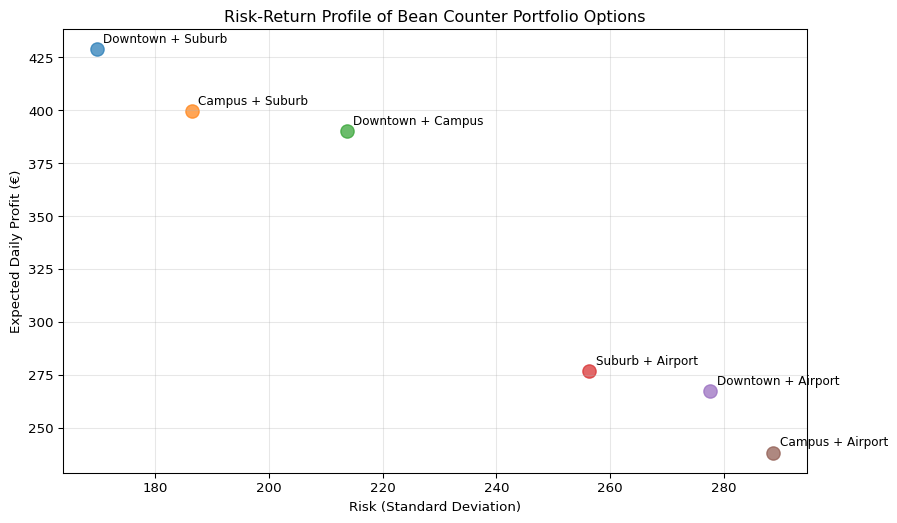

In [24]:
# Create risk-return scatter plot for Bean Counter expansion
plt.figure(figsize=(10, 6))

for _, row in df_portfolios.iterrows():
    plt.scatter(row['std'], row['mean'], s=100, alpha=0.7)
    plt.annotate(row['pair'], (row['std'], row['mean']),
                fontsize=9, xytext=(5, 5), textcoords='offset points')

plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Daily Profit (€)')
plt.title('Risk-Return Profile of Bean Counter Portfolio Options')
plt.grid(True, alpha=0.3)
plt.show()

## Exercise 5.1 - Final CEO Recommendation

Based on your analysis, make a strategic expansion recommendation for
Bean Counter.

In [25]:
# YOUR CODE BELOW
# Create a recommendation dictionary with your analysis

# Which portfolio maximizes expected profit?
max_profit_portfolio =

# Which portfolio minimizes risk (lowest std)?
min_risk_portfolio =

# Your final recommendation (choose one)
final_recommendation = # Choose the portfolio you would recommend

In [27]:
# Don't modify below
assert final_recommendation in df_portfolios['pair'].values, "Must choose an actual portfolio"
print(f"\nYour Recommendation: {final_recommendation}")

# Conclusion

**Outstanding work, CEO!** You’ve successfully applied Monte Carlo
simulation to Bean Counter’s expansion strategy and mastered the key
skills needed for the TechVenture competition:

-   **Simulating uncertain returns** using probability distributions
-   **Running thousands of scenarios** with Monte Carlo
-   **Calculating risk metrics** (VaR, Expected Shortfall)
-   **Comparing portfolio combinations** systematically
-   **Making data-driven recommendations** with clear justification

When you tackle the TechVenture challenge, apply what you’ve learned at
Bean Counter:

1.  **Start Simple:** Get one startup simulation working first
2.  **Verify Distributions:** Plot histograms to check your simulations
3.  **Calculate All Metrics:** Don’t just look at mean returns
4.  **Compare Systematically:** Analyze all 6 pairs
5.  **Justify Clearly:** Explain WHY your choice is best

## Key Differences for Competition

The competition uses:

-   **Investment returns** instead of daily profits
-   **Different distributions** (some normal, one uniform)
-   **Larger scale** (€1M investments vs daily operations)

But the approach is identical! Apply what you’ve learned here.

> **Tip**
>
> Just as you’ve optimized Bean Counter’s expansion, use scoring
> functions in the competition to make objective decisions when multiple
> factors matter. Your journey from Barista Trainee to CEO has prepared
> you for this!

Good luck in the TechVenture Investment Challenge, CEO!